In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import csv
from collections import defaultdict
import time
%matplotlib inline

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

In [9]:
def time_delta(func, *args, **kwargs): 
    start_time = time.time()
    func(*args, **kwargs)
    end_time = time.time()
    
    return end_time-start_time

In [10]:
def merge_two_dicts(dict1, dict2):
    dict3 = defaultdict(list)
    items = list(dict1.items())+list(dict2.items())

    for k, v in items:
        for item in v:
            dict3[k].append(item)
    return dict3

In [11]:
def read_task_1(file_name, header, sep='|'):
    result = {}
    data = np.genfromtxt(file_name, delimiter=sep, skip_header=1)
    for i, name in enumerate(header):
        result[name] = data[:,i]
    return result

In [12]:
def read_task_2_3(file_name, sep='|', test_size=.3, bias=True):
    data = np.genfromtxt(file_name, delimiter=sep, skip_header=1)
    
    train_idx = np.random.choice(range(data.shape[0]), size=int(data.shape[0]*(1 - test_size)), replace = False)
    test_idx  = np.array([i for i in range(data.shape[0]) if i not in train_idx])
    
    if bias:
        X_train = np.hstack((data[train_idx,:-1], 
                             np.ones((train_idx.shape[0], 1))
                            ))
        X_test =  np.hstack((data[test_idx,:-1],
                         np.ones((test_idx.shape[0], 1))
                        ))
    else:
        X_train = data[train_idx,:-1]
        X_test = data[test_idx,:-1]
        
    y_train = data[train_idx,-1] 
    
   
    y_test = data[test_idx,-1]
    return X_train, y_train, X_test, y_test

In [13]:
def plot_correlation_matrix(corr_mtrx):
    f = plt.figure(figsize=(8, 8))
    plt.matshow(corr_mtrx, fignum=f.number)
    plt.xticks(range(corr_mtrx.shape[1]), fontsize=9, rotation=45)
    plt.yticks(range(corr_mtrx.shape[1]), fontsize=9)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)

# –ü–ª–∞–Ω

__–í—ã –Ω–∞—É—á–∏—Ç–µ—Å—å:__
    1. –†–µ—à–∞—Ç—å –∑–∞–¥–∞—á—É –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏
    2. –ü–æ–Ω–∏–º–∞—Ç—å –∫–∞–∫ —Ä–∞–±–æ—Ç–∞—é—Ç –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    3. –†–∞–∑–±–∏—Ä–∞—Ç—å—Å—è —á—Ç–æ —Ç–∞–∫–æ–µ –ø–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏ –∫–∞–∫ —Å–¥–µ–ª–∞—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–µ —Å–æ–≤—Å–µ–º –ª–∏–Ω–µ–π–Ω–æ–π (–∫–∞–∫ —Ç–∞–∫ –≤—ã—Ö–æ–¥–∏—Ç?)
    4. –ü–æ–Ω–∏–º–∞—Ç—å —á—Ç–æ —Ç–∞–∫–æ–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤  –∏ –∑–∞—á–µ–º –æ–Ω–∞ –Ω—É–∂–Ω–∞ (Difference in Differences?)
    5. –†–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π –∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã–π —Å–ø—É—Å–∫ –¥–ª—è –∑–∞–¥–∞—á–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
    6. –ü–æ–Ω–∏–º–∞—Ç—å –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è 
    7. –ü—Ä–µ–≤—Ä–∞—â–∞—Ç—å –ª–∏–Ω–µ–π–Ω—ã–π —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –≤ –ª–∏–Ω–µ–π–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
    
__–í–∞–∂–Ω–æ:__ –ù–æ—É—Ç–±—É–∫ —Å—Ç–æ–∏—Ç –ø—Ä–æ—Ö–æ–¥–∏—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ. –ö–∞–∂–¥–æ–µ –Ω–æ–≤–æ–µ –∑–∞–¥–∞–Ω–∏–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏ —Ñ—É–Ω–∫—Ü–∏–∏ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —à–∞–≥–æ–≤

# Regression

## –û–¥–Ω–æ–º–µ—Ä–Ω—ã–π —Å–ª—É—á–∞–π

<font size=3>__–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö__</font>

–í—ã –ø–æ–ª—É—á–∏—Ç–µ __—Å–ª–æ–≤–∞—Ä—å__ —Å–æ —Å–ª–µ–¥—É–±—â–∏–º–∏ –∫–ª—é—á–∞–º–∏:
- __x_train__:  –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è
- __y_train__:  —Ü–µ–ª–µ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä–æ–π —Ñ—É–Ω–∫—Ü–∏–∏
- __mainfold__: –∏–¥–µ–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

–ó–Ω–∞—á–µ–Ω–∏—è —Å–ª–æ–≤–∞—Ä—è: –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π numpy –º–∞—Å—Å–∏–≤.

P.S. –î–∞, —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç—É—Ç –Ω–µ—Ç

In [14]:
data = read_task_1('./task_1.csv', header=['x_train', 'y_train', 'manifold'])

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ0.1: –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è__</font>

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å _y_train_ –æ—Ç _x_train_ –∏ –∑–Ω–∞—á–µ–Ω–∏—è _manifold_

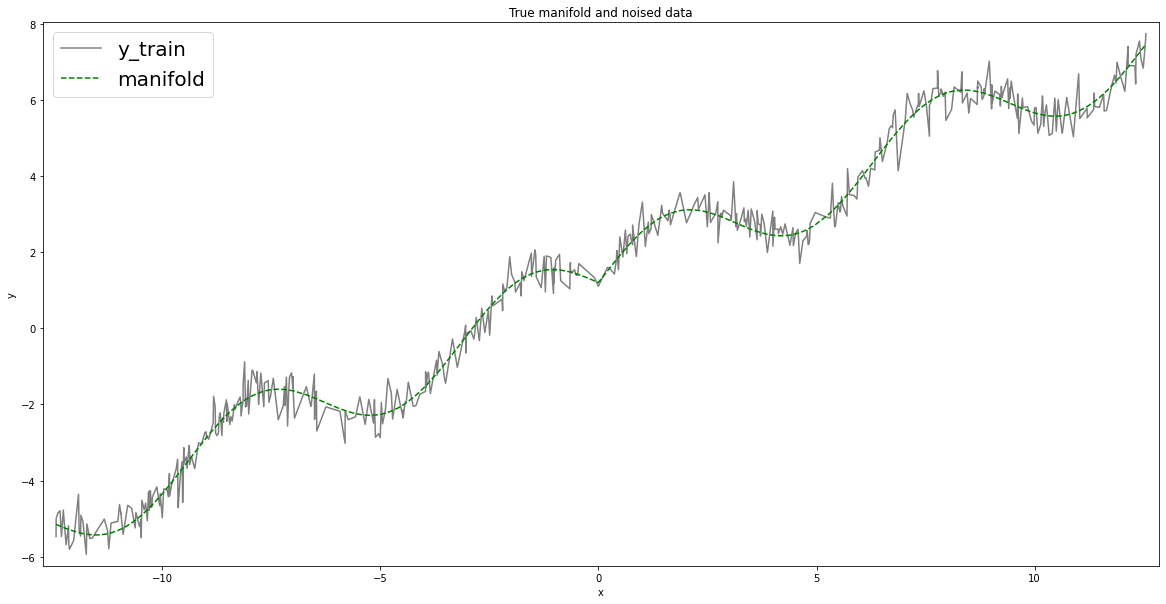

In [15]:
margin = 0.3
plt.figure(figsize=(20,10))

plt.plot(data['x_train'], data['y_train'], color='gray', linestyle='-', label='y_train')
plt.plot(data['x_train'], data['manifold'], color='green', linestyle='--', label='manifold')

# YOUR CODE HERE

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)

plt.legend(loc='upper left', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### –ú–µ—Ç–æ–¥ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ (Ordinary Least Squares)


<font size=3>__–ù–µ–º–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏__</font>

–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ –≤–∏–¥–µ ___–ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤___ —Å –Ω–µ–∫–æ—Ç–æ—Ä—ã–º–∏ –≤–µ—Å–∞–º–∏. –ü–æ–∏—Å–∫ ___–≤–µ—Å–æ–≤___ —è–≤–ª—è–µ—Ç—Å—è —Ü–µ–ª—å—é –æ–±—É—á–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞, —á—Ç–æ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –ø—Ä–∏ –ø–æ–º–æ—â–∏ ___–º–∏–Ω–∏–º–∏–∑–∞—Ü–∏–∏___ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ ___—Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª–∞ –æ—à–∏–±–∫–∏___.

<font size=2.3>__–ö–∞–∫ —Å—Ç—Ä–æ–∏—Ç—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ?__</font>

–§—É–Ω–∫—Ü–∏—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ $y$ –æ—Ç $x$ –±—É–¥–µ—Ç –∏–º–µ—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –≤–∏–¥ $y_i=\sum_{j=1}^m{w_jx_{ij}}+w_{0}+\epsilon_i$, —á—Ç–æ –∏ —è–≤–ª—è–µ—Ç—Å—è ___–ª–∏–Ω–µ–π–Ω–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–µ–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤___. –û–±–æ–±—â–∏—Ç—å –¥–∞–Ω–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ –º–æ–∂–Ω–æ —Å –ø–æ–º–æ—â—å—é –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ñ–∏–∫—Ç–∏–≤–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π $x_0=1$ (bais). –ò —Ç–æ–≥–¥–∞ –≤ –º–∞—Ç—Ä–∏—á–Ω–æ–º –≤–∏–¥–µ –ø–æ–ª—É—á–∞–µ–º:

<font size=4>$$y=Xw+\epsilon$$</font>
–≥–¥–µ:
- $w$ $-$ –æ—Ü–µ–Ω–∫–∞ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
- $X$ $-$ –º–∞—Ç—Ä–∏—Ü–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Å–æ—Å—Ç–æ—è—â–∞—è –∏–∑ $n$ —Å—Ç—Ä–æ–∫ –∏ $m+1$ —Å—Ç–æ–ª–±—Ü–æ–≤ (–≤–æ–ø—Ä–æ—Å –≤ —Å—Ç—É–¥–∏—é: –ø–æ—á–µ–º—É +1?)
- $\epsilon$ $-$ —Å–ª—É—á–∞–π–Ω–∞—è –æ—à–∏–±–∫–∞ –º–æ–¥–µ–ª–∏

<font size=2.3>__–ö–∞–∫ –Ω–∞–π—Ç–∏ "–ø–æ–¥—Ö–æ–¥—è—â–∏–µ" –≤–µ—Å–∞?__</font>


–ú–µ—Ç–æ–¥ –Ω–∞–∏–º–µ–Ω—å—à–∏—Ö –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –æ–¥–∏–Ω –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ –∏—Ö –ø–æ–∏—Å–∫–∞, –≤ —Ä–∞–º–∫–∞—Ö –∫–æ—Ç–æ—Ä–æ–≥–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è __—Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞__

<font size=4>\begin{array}{rcl}\mathcal{L}\left( X, {y}, {w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - {w}^\text{T} {x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| {y} -  X {w} \right\|_2^2 \\
&=& \frac{1}{2n} \left({y} -  X {w}\right)^\text{T} \left({y} -  X {w}\right)
\end{array}</font>


–î–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤–∑—è—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é –ø–æ –≤–µ—Å–∞–º $w$ –∏ –ø—Ä–∏—Ä–æ–≤–Ω—è—Ç—å –µ–µ –∫ –Ω—É–ª—é:

\begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial {w}} &=& \frac{1}{2n} \left( {y}^{\text{T}} {y} -2{y}^{\text{T}} {X} {w} + {w}^{\text{T}} {X}^{\text{T}} {X} {w}\right) \\
&=& \frac{1}{2n} \left(-2 {X}^{\text{T}} {y} + 2{X}^{\text{T}} {X} {w}\right)
\end{array}


\begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial {w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 {X}^{\text{T}} {y} + 2{X}^{\text{T}} {X} {w}\right) = 0 \\
&\Leftrightarrow& -{X}^{\text{T}} {y} + {X}^{\text{T}} {X} {w} = 0 \\
&\Leftrightarrow& {X}^{\text{T}} {X} {w} = {X}^{\text{T}} {y} \\
\end{array} 

<font size=4>$$ {w} = \left({X}^{\text{T}} {X}\right)^{-1} {X}^{\text{T}} {y}$$ </font>

–†–µ—à–µ–Ω–∏–µ, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –ú–ù–ö, –∏–º–µ–µ—Ç –Ω–∞–∏–º–µ–Ω—å—à—É—é –¥–∏—Å–ø–µ—Ä—Å–∏—é —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö –ª–∏–Ω–µ–π–Ω—ã—Ö –∏ –Ω–µ—Å–º–µ—â–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫, –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è 
[—Ç–µ–æ—Ä–µ–º—ã –ì–∞—É—Å—Å–∞ - –ú–∞—Ä–∫–æ–≤–∞](https://ru.wikipedia.org/wiki/–¢–µ–æ—Ä–µ–º–∞_–ì–∞—É—Å—Å–∞_‚Äî_–ú–∞—Ä–∫–æ–≤–∞).

–¢–∞–∫–∂–µ —ç—Ç—É –∑–∞–¥–∞—á—É –º–æ–∂–Ω–æ —Ä–µ—à–∞—Ç—å —á–∏—Å–ª–µ–Ω–Ω–æ —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞, –æ–± —ç—Ç–æ–º —Ä–µ—á—å –ø–æ–π–¥–µ—Ç –¥–∞–ª—å—à–µ.

<font size=3 color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ1: –ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ –ú–ù–ö__</font>

__–í –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å 2 —Ñ—É–Ω–∫—Ü–∏–∏:__
- __least_squares_weights__: –≤ —Ä–∞–º–∫–∞—Ö –∫–æ—Ç–æ—Ä–æ–π –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –ú–ù–ö –ø–æ–¥—Ö–æ–¥ –∫ –ø–æ–∏—Å–∫—É –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –§—É–Ω–∫—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π numpy –º–∞—Å—Å–∏–≤ –¥–ª–∏–Ω—ã $m$, –≥–¥–µ $m$ $-$ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –º–∞—Ç—Ä–∏—Ü—ã $x$
- __least_squares_predict__: –§—É–Ω–∫—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π numpy –º–∞—Å—Å–∏–≤ –¥–ª–∏–Ω—ã $n$, –≥–¥–µ $n$ $-$ —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤ –º–∞—Ç—Ä–∏—Ü—ã $x$. –ü—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –º–∞—Ç—Ä–∏—Ü—É –æ–±—ä–µ–∫—Ç—ã-–ø—Ä–∏–∑–Ω–∞–∫–∏ $x$ –∏ –≤–µ—Å–∞ $w$. 

__!!–í–ê–ñ–ù–û!!__: 
- –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –≤ —ç—Ç–∏—Ö —Ñ—É–Ω–∫—Ü–∏—è—Ö —Ü–∏–∫–ª—ã $-$ —Ç–æ–≥–¥–∞ –æ–Ω–∞ –±—É–¥–µ—Ç –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π
- –Ω–µ –∏–∑–º–µ–Ω—è–π—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è X_train –∏ Y_train, –∏–Ω–∞—á–µ –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–µ –æ—Ç—Ä–∞–±–æ—Ç–∞–µ—Ç (–Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ç–æ–ª—å–∫–æ –≤ —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏).


In [16]:
X_train = np.array([data['x_train']]).T
Y_train = data['y_train']

In [17]:
def least_squares_weights(x, y):
    # YOUR CODE HERE
    w=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return w

W = least_squares_weights(X_train, Y_train)

# TESTS
assert type(W) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert W.shape == (1,), '–ü—Ä–æ–≤–µ—Ä—å—Ç–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤—ã—Ö–æ–¥—è—â–µ–≥–æ –≤–µ–∫—Ç–æ—Ä–∞'
assert round(W[0], 3) == 0.493, '–ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç –≤–µ—Å–æ–≤'
assert time_delta(least_squares_weights, X_train, Y_train) < 1.5, '–§—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ, –≤–æ–∑–º–æ–∂–Ω–æ –≤—ã –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ –ª–∏—à–Ω–∏–µ —Ü–∏–∫–ª—ã'

In [18]:
def least_squares_predict(w, x):
    result = x.dot(w.T)
    return result


Y_train_predict = least_squares_predict(W, X_train)

# TESTS
assert type(Y_train) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert Y_train_predict.shape == (500,), '–ü—Ä–æ–≤–µ—Ä—å—Ç–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤—ã—Ö–æ–¥—è—â–µ–≥–æ –≤–µ–∫—Ç–æ—Ä–∞'
assert round(Y_train_predict[123], 3) == -3.706, '–ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç –≤–µ—Å–æ–≤'
assert time_delta(least_squares_predict, W, X_train) < 1.5, '–§—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ, –≤–æ–∑–º–æ–∂–Ω–æ –≤—ã –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ –ª–∏—à–Ω–∏–µ —Ü–∏–∫–ª—ã'

### Errors

<font size=3 >__–ù–µ–º–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏__</font>

–ú—ã —Ä–∞–∑–±–µ—Ä–µ–º __–æ—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∏ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—ã –ø–æ—Ç–µ—Ä—å__ –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. –î–∞–ª–µ–µ –≤—Å–µ –±—É–¥–µ–º –Ω–∞–∑—ã–≤–∞—Ç—å __–º–µ—Ç—Ä–∏–∫–∞–º–∏__.

__–ú–µ—Ç—Ä–∏–∫–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã –¥–ª—è:__
- –ø–æ–∏—Å–∫–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è
- –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏
- —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
- –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤



<table border="1" width="100%">
 <tr>
    <td width="50%"> 
        <p> <font size=3> $MAE= \frac{1}{n} \sum_{i=1}^n |y_i-\hat{y_i}|$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –ª–µ–≥–∫–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å 
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –µ–¥–∏–Ω–∏—Ü—ã –∏–∑–º–µ—Ä–µ–Ω–∏—è —Ç–∞—Ä–≥–µ—Ç–∞ –∏ –º–µ—Ç—Ä–∏–∫–∏ ‚Äì —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                —É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞ –≤ —Ç–∞–∫–æ–º –≤–∏–¥–µ 
            </font>
        </p><br/>
        <p> <font size=3> $MSE= \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2$  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞
            </font><br/>
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                —Å–ª–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å 
            </font><br/>
        </p><br/>
        <p> <font size=3> $RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i-\hat{y_i})^2} $  </font> </p> 
        <p> 
            <font size=2> 
                <span style="color:green; margin-left:2em">$ +$ </span>
                –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É 
            </font><br/>
            <font size=2> 
                <span style="color:red; margin-left:2em">$ -$ </span>
                –µ—â–µ —Å–ª–æ–∂–Ω–µ–µ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å 
            </font>
        <p>–û—Å–Ω–æ–≤–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ $RMSE$ –∏ $MAE$ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –º–∏–Ω–∏–º–∏–∑–∞—Ü–∏—è $RMSE$ —Å—Ä–µ–º–∏—Ç—å—Å—è –∫ —Å—Ä–µ–¥–Ω–µ–π –æ—Ü–µ–Ω–∫–µ, –∞  $MAE$ –∫ –º–µ–¥–∏–∞–Ω–µ</p><br/><p>$y$ $-$ –∏—Å—Ç–∏–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ; $\hat{y}$ $-$ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ</p>
        </p><br/>
     </td>
    <td><img src="./errors_2.png" align="right"></td>
 </tr>
</table>

–î–≤–µ –ø–æ–ø—ã—Ç–∫–∏ __–æ–±—ä–µ–¥–∏–Ω–∏—Ç—å__ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ __—Å–≤–æ–π—Å—Ç–≤–∞ –º–µ—Ç—Ä–∏–∫__:
- [–§—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å –•—å—é–±–µ—Ä–∞](https://en.wikipedia.org/wiki/Huber_loss): 
    * –≤–µ–¥–µ—Ç —Å–µ–±—è –∫–∞–∫ $MSE$ –Ω–∞ –æ—à–∏–±–∫–∞—Ö –º–µ–Ω—å—à–µ $\sigma$ –∏ –∫–∞–∫ $MAE$ –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ. __–ß—Ç–æ –Ω–µ –¥–∞–µ—Ç "–≤–∑—Ä—ã–≤–∞—Ç—å—Å—è" –º–µ—Ç—Ä–∏–∫–µ –Ω–∞ –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö –∏ "–∂–µ—Å—Ç–∫–æ" —Ä–µ–∞–≥–∏—Ä—É–µ—Ç –Ω–∞ –º–∞–ª–µ–Ω—å–∫–∏–µ –æ—Å—Ç–∞—Ç–∫–∏__
    * –≤—Å–µ —Ç–∞–∫ –∂–µ –Ω–µ —É–¥–æ–±–Ω–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞—Ç—å
- [Log-Cosh Loss](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0):
    * –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –º–µ–Ω—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å –•—å—é–±–µ—Ä–∞ –Ω–∞ –≤—Å–µ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ
    * __–¥–≤–∞–∂–¥—ã –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞__, —á—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –º–µ—Ç–æ–¥–∞—Ö —á–∏—Å–ª–µ–Ω–Ω–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏.
________________________
__–ü—Ä–æ–±–ª–µ–º–∞:__ –≤—Å–µ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Ç—Ä–∏–∫–∏ __–Ω–µ –ø–æ–¥—Ö–æ–¥—è—Ç –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è__ –∞ —Ç–æ–ª—å–∫–æ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π, —á—Ç–æ —Å–ª–µ–¥—É–µ—Ç –∏–∑ —Ç–æ–≥–æ —á—Ç–æ __—Ñ—É–Ω–∫—Ü–∏–∏ –Ω–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω—ã —Å–≤–µ—Ä—Ö—É.__ 

–≠—Ç–∞ –ø—Ä–æ–±–ª–µ–º–∞ —Ç–∞–∫ –∂–µ —Ä–µ—à–∞–µ—Ç—Å—è –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–æ–º –¥–æ—Ä–∞–±–æ—Ç–æ–∫ $MAE$: [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) –∏ [SMAPE](https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error). –û–¥–Ω–∞–∫–æ, –ø–æ–¥—Ä–æ–±–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –º–µ—Ç—Ä–∏–∫—É $R^2$
–∏ –º–æ—Ç–∏–≤—ã –ø–æ—è–≤–ª–µ–Ω–∏—è $R^2_{adj}$.

$$R^2=1-\frac{\sum_{i=1}^n (y_i-\hat{y_i})^2}{\sum_{i=1}^n (y_i-\bar{y_i})^2}$$

–î–∞–Ω–Ω–∞—è –º–µ—Ç—Ä–∏–∫–∞ –æ–±–ª–∞–¥–∞–µ—Ç —Å–ª–µ–¥—É—é—â–∏–º–∏ —Å–≤–æ–π—Å—Ç–≤–∞–º–∏:

<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∞ —Å–≤–µ—Ä—Ö—É –∏ —Å–Ω–∏–∑—É, —á—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –¥–∞—Ç—å –æ—Ü–µ–Ω–∫—É –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É —Ä–µ—à–µ–Ω–∏—é –±–µ–∑ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å –¥—Ä—É–≥–∏–º–∏
</font><br/>
<font size=2> 
    <span style="color:green; margin-left:2em">$ +$ </span>
     —Ö–æ—Ä–æ—à–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ—Ç—Å—è: –Ω–∞ —Å–∫–æ–ª—å–∫–æ –Ω–∞—à–∞ –º–æ–¥–µ–ª—å –ª—É—á—à–µ, —á–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     –Ω–µ –¥–∏—Ñ—Ñ–∏—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞
</font><br/>
<font size=2> 
    <span style="color:red; margin-left:2em">$ -$ </span>
     –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å—Ç–µ—Ç (–Ω–µ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è) –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –Ω–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –¥–∞–∂–µ –µ—Å–ª–∏ –æ–Ω–∏ –Ω–∏–∫–∞–∫ –Ω–µ –æ–±—ä—è—Å–Ω—è—é—Ç —Ü–µ–ª–µ–≤–æ–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å. –ü–æ—ç—Ç–æ–º—É –Ω–µ–ª—å–∑—è —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –º–æ–¥–µ–ª–∏ —Å —Ä–∞–∑–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –î–∞–Ω–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ —Ä–µ—à–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é $R^2_{adj}$
</font>

$$R^2_{adj}=1-(1-R^2)\frac{n-1}{n-p-1}$$

–≥–¥–µ $p -$ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞ $n -$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤

__–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏:__ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å $R^2_{adj}$ –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π –∏ –æ—Ü–µ–Ω–∫–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∞ $R^2$ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ –Ω–æ–≤—ã—Ö –æ–±—ä–µ–∫—Ç–∞—Ö

<font size=3 color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ2: –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞__</font>

__–í –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å 4 –æ—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏:__ $MAE; MSE; RMSE; R^2$

–ö–∞–∂–¥–∞—è –∏–∑ –º–µ—Ç—Ä–∏–∫ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ 2 –æ–¥–Ω–æ–º–µ—Ä–Ω—ã—Ö numpy –º–∞—Å—Å–∏–≤–∞:
- __y_true__ - –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è 
- __y_predict__ - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

–ö–∞–∂–¥–∞—è –∏–∑ —Ñ—É–Ω–∫—Ü–∏–π –¥–æ–ª–∂–Ω–∞ –≤–æ–∑–≤—Ä–∞—à–∞—Ç—å –æ–¥–Ω–æ —á–∏—Å–ª–æ 

__!!–í–ê–ñ–ù–û!!__: –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –≤ —ç—Ç–∏—Ö —Ñ—É–Ω–∫—Ü–∏—è—Ö —Ü–∏–∫–ª—ã $-$ —Ç–æ–≥–¥–∞ –æ–Ω–∞ –±—É–¥–µ—Ç –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ–π.

In [19]:
def MAError(y_true, y_predict):
    # YOUR CODE HERE
    error = np.mean(abs(y_true - y_predict))
    return error

def MSError(y_true, y_predict):
    # YOUR CODE HERE
    error = np.mean(pow(y_true - y_predict, 2))
    return error

def RMSError(y_true, y_predict):
    # YOUR CODE HERE
    error = pow(np.mean(pow(y_true - y_predict, 2)), 0.5)
    return error

def R_square(y_true, y_predict):
    # YOUR CODE HERE
    y_middle = np.mean(y_true)
    error = 1 - sum(pow(y_true - y_predict, 2)) / sum(pow(y_true - y_middle, 2))
    return error

def all_metric(y_true, y_predict):
    d = {}
    d['MAE'] = [MAError(y_true, y_predict)] 
    d['MSE'] = [MSError(y_true, y_predict)] 
    d['RMSE'] = [RMSError(y_true, y_predict)]
    d['R_square'] = [R_square(y_true, y_predict)]
    return d

# TESTS
assert round(MAError(y_true=Y_train, y_predict=Y_train_predict), 3) == 1.274, '–ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'
assert time_delta(MAError, Y_train, Y_train_predict) < 1.5, '–§—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ, –≤–æ–∑–º–æ–∂–Ω–æ –≤—ã –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ –ª–∏—à–Ω–∏–µ —Ü–∏–∫–ª—ã'

assert round(MSError(y_true=Y_train, y_predict=Y_train_predict), 3) == 2.22, '–ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'
assert time_delta(MSError, Y_train, Y_train_predict) < 1.5, '–§—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ, –≤–æ–∑–º–æ–∂–Ω–æ –≤—ã –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ –ª–∏—à–Ω–∏–µ —Ü–∏–∫–ª—ã'

assert round(RMSError(y_true=Y_train, y_predict=Y_train_predict), 3)== 1.49, '–ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'
assert time_delta(RMSError, Y_train, Y_train_predict) < 1.5, '–§—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ, –≤–æ–∑–º–æ–∂–Ω–æ –≤—ã –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ –ª–∏—à–Ω–∏–µ —Ü–∏–∫–ª—ã'

assert round(R_square(y_true=Y_train, y_predict=Y_train_predict), 3)== 0.843, '–ù–µ –≤–µ—Ä–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω —Ä–∞—Å—á—ë—Ç'
assert time_delta(R_square, Y_train, Y_train_predict) < 1.5, '–§—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–æ, –≤–æ–∑–º–æ–∂–Ω–æ –≤—ã –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ –ª–∏—à–Ω–∏–µ —Ü–∏–∫–ª—ã'

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ0.2: –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è__</font>

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å _y_train_ –æ—Ç _x_train_; –∑–Ω–∞—á–µ–Ω–∏—è _manifold_; –∞ —Ç–∞–∫ –∂–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏

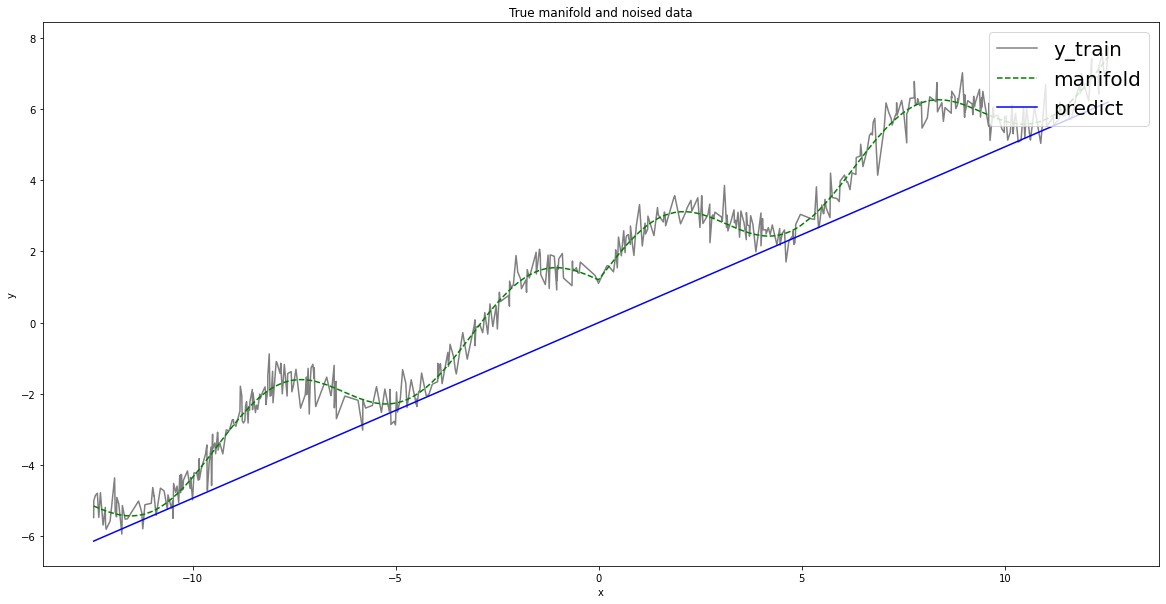

In [20]:
plt.figure(figsize=(20,10))

# YOUR CODE HERE

plt.plot(data['x_train'], data['y_train'], color='gray', linestyle='-', label='y_train')
plt.plot(data['x_train'], data['manifold'], color='green', linestyle='--', label='manifold')
plt.plot(data['x_train'], Y_train_predict, color='blue', linestyle='-', label='predict')

plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ3: –£–ª—É—á—à–∏—Ç—å –º–æ–¥–µ–ª—å__</font>

–ï—Å–ª–∏ –≤—Å–µ —Å–¥–µ–ª–∞–Ω–æ –≤–µ—Ä–Ω–æ, —Ç–æ –≤–∞—à —Ç–µ–∫—É—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç $R^2 \approx 0.84$, —á—Ç–æ –≤ —Ü–µ–ª–æ–º –Ω–µ–ø–ª–æ—Ö–æ, –Ω–æ –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –º–æ–∂–Ω–æ –ª—É—á—à–µ.

_–°–æ–æ–±—â–∏—Ç–µ, –µ—Å–ª–∏ —ç—Ç–æ –Ω–µ—Ç —Ç–∞–∫_

__–¶–µ–ª—å:__ –£–ª—É—á—à–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –æ—Å—Ç–∞–≤–∏–≤ –ª–∏–Ω–µ–π–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –ö–∞–∂–µ—Ç—Å—è, —á—Ç–æ —ç—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å, –¥–æ–±–∞–≤–∏–≤ –ª–∏—à—å –æ–¥–∏–Ω –ø—Ä–∏–∑–Ω–∞–∫.

In [21]:
X_train_ = np.append(X_train, np.ones(X_train.shape[0])[:, np.newaxis], axis = 1)
W_new = least_squares_weights(X_train_, Y_train)
Y_train_predict_new = least_squares_predict(W_new, X_train_)


assert round(R_square(y_true=Y_train, y_predict=Y_train_predict_new), 3) >= .95, '–º–æ–∂–Ω–æ –ª—É—á—à–µ'
assert X_train_.shape[1] == 2, '–¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 2 –ø—Ä–∏–∑–Ω–∞–∫–∞'

### –ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

–õ–µ–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å —Ç—Ä–µ–±—É–µ—Ç –ª–∏–Ω–µ–π–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —Ü–µ–ª–µ–≤–æ–π –∏ –æ–±—ä—è—Å–Ω—è—é—â–µ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, —á—Ç–æ —á–∞—Å—Ç–æ –Ω–µ—Ç —Ç–∞–∫. –û–¥–Ω–∞–∫–æ –º–æ–∂–Ω–æ "—Å–∫—Ä–∏–≤–∏—Ç—å" –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ.

<font size=3 >__–ù–µ–º–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏__</font>

–ß—Ç–æ –±—ã __—É–≤–µ–ª–∏—á–∏—Ç—å —Å–ª–æ–∂–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏__ –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–≤–µ–ª–∏—á–∏—Ç—å —Å–ª–æ–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –í –æ–±—â–µ–º —Å–ª—É—á–∞–µ –º—ã –ø–µ—Ä–µ—Ö–æ–¥–∏–º –æ—Ç __–ª–∏–Ω–µ–π–Ω–æ–≥–æ —É—Ä–æ–≤–Ω–µ–Ω–∏—è –∫ –ø–æ–ª–∏–Ω–æ–º—É__:

$$Y=w_0+w_1x \Rightarrow Y=w_0+w_1x+w_2x^2$$

–≠—Ç–æ __–≤—Å–µ –µ—â–µ –ª–∏–Ω–µ–π–Ω–∞—è –º–æ–¥–µ–ª—å__ —Ç–∞–∫ –∫–∞–∫ –≤–µ—Å–∞ –≤—Å–µ –µ—â–µ –ª–∏–Ω–µ–π–Ω—ã. $x^2$ –≤—Å–µ–≥–æ –ª–∏—à—å –ø—Ä–∏–∑–Ω–∞–∫ –æ–ø–∏—Å—ã–≤–∞—é—â–∏–π –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å $y$ –æ—Ç $x$.

–í —Ü–µ–ª–æ–º, –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω–æ –±—Ä–∞—Ç—å –ø–æ–ª–∏–Ω–æ–º—ã. –ú–æ–∂–Ω–æ –Ω–∞–∫–ª–∞–¥—ã–≤–∞—Ç—å –ª—é–±—É—é –Ω–µ–ª–∏–Ω–µ–π–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é, –∞ —Ç–∞–∫–∂–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –µ—Å–ª–∏ —É –Ω–∞—Å –±–æ–ª–µ–µ –æ–¥–Ω–æ–π –æ–ø–∏—Å—ã–≤–∞—é—â–µ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ4: –ü–æ–ª–∏–Ω–æ–º–∏–∞–ª—å–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è__</font>

–í –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤—ã —É–≤–∏–¥–∏—Ç–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ –º–µ—Ç—Ä–∏–∫ –∫–∞—á–µ—Å—Ç–≤–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Å—Ç–µ–ø–µ–Ω–∏ –ø–æ–ª–∏–Ω–æ–º–∞. –ò—Å—Ö–æ–¥–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—Ä–∏–º–µ—Ç —Å–ª–µ–¥—É—é—â–∏–π –≤–∏–¥:
   
   $$Y=w_0+\sum_{j=1}^nw_jx^j$$

__–¶–µ–ª—å__: –†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å __–∫–æ–¥ –∏–ª–∏ —Ñ—É–Ω–∫—Ü–∏—é__, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –≤—ã–∑—ã–≤–∞—Ç—å—Å—è –≤ —É–∂–µ –Ω–∞–ø–∏—Å–∞–Ω–Ω–æ–º —Ü–∏–∫–ª–µ, –ø—Ä–∏–Ω–∏–º–∞—Ç—å –Ω–∞ –≤—Ö–æ–¥ —Ä–∞–∑–º–µ—Ä –ø–æ–ª–∏–Ω–æ–º–∞ (–∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ degree_variance) –∏ –∑–Ω–∞—á–µ–Ω–∏—è $X$ –∏ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ —Ä–∞–∑–º–µ—Ä–∞.


__!!–í–ê–ñ–ù–û!!__: 
- –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –∫–æ–¥–∞ —É–∂–µ –Ω–∞–ø–∏—Å–∞–Ω–∞, –Ω–µ —Å—Ç–æ–∏—Ç –µ–µ –º–µ–Ω—è—Ç—å
- –Ω–µ –∑–∞–±—ã–≤–∞–π—Ç–µ $w_0$ (bais –≤–µ–∫—Ç–æ—Ä), —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–º–æ –ø–æ—Å—Ä–µ–¥—Å—Ç–≤–æ–º –¥–æ–±–∞–≤–ª–µ–Ω–∏—è —Ñ–∏–∫—Ç–∏–≤–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

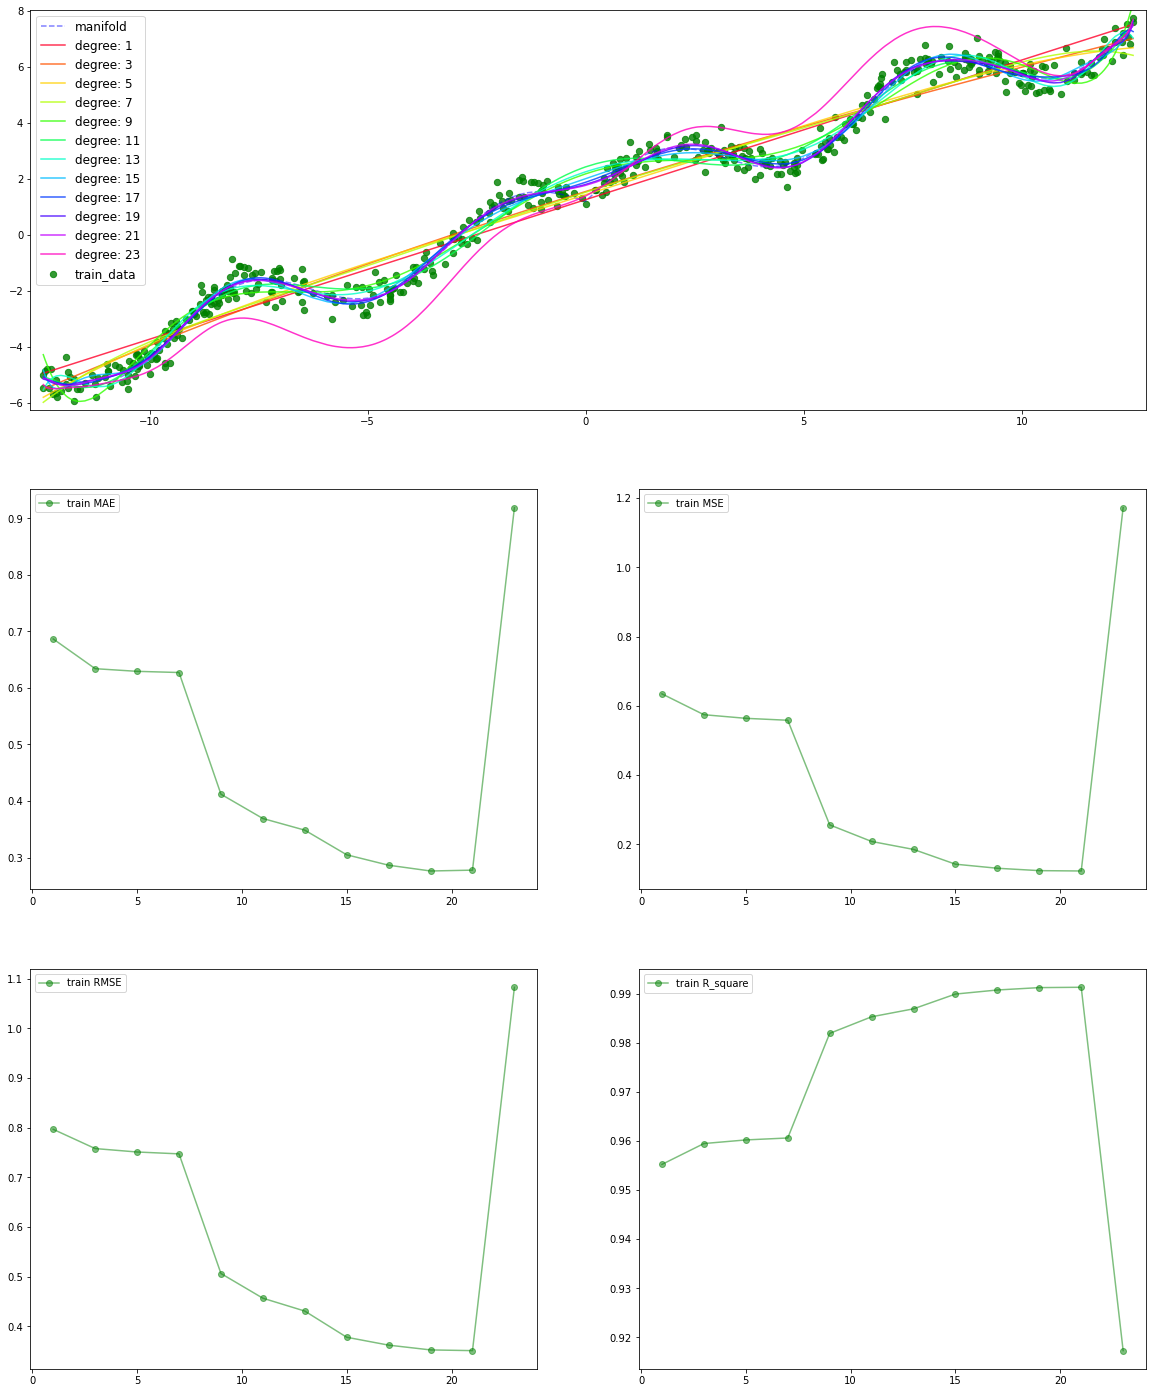

In [22]:
def get_X_train(degree_variance, x):
    result = []
    for x_i in x:
        result.append([pow(x_i[0], l) for l in range(degree_variance + 1)])
    return np.array(result)


degree_variance = range(1,24, 2) 
train_errors, test_errors = {}, {}

# PLOT SET
fig = plt.figure(figsize=(20, 25))
colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,len(degree_variance))]

ax1 = plt.subplot(311)
ax1.plot(data['x_train'], data['manifold'], 'b--', alpha=0.5, label='manifold')
ax1.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='train_data')
ax1.set_xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
ax1.set_ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)

init_data = np.array([data['x_train']]).T
for i, v in enumerate(degree_variance):
 
    # TRAIN
    X_train = get_X_train(v, init_data) # YOUR CODE HERE

    assert X_train.shape[1] == 1+v, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫ —Å—Ç–µ–ø–µ–Ω—å –ø–æ–ª–∏–Ω–æ–º–∞ + bais'
    
    
    Y_train = data['y_train']

    # PREDICT
    W = least_squares_weights(X_train, Y_train)
    Y_train_predict = least_squares_predict(W, X_train)
    
    # PLOT SOLUTION
    ax1.plot(data['x_train'], Y_train_predict, color = colors[i], alpha=0.8, label='degree: {}'.format(v))   
    ax1.legend(loc='upper left', prop={'size': 12})
    
    # ERRORS
    train_errors = merge_two_dicts(train_errors, all_metric(Y_train, Y_train_predict))

# PLOT ERRORS
for i, key in enumerate(train_errors.keys()):
    plt.subplot(3,2,i+3)
    plt.plot(degree_variance, train_errors[key], 'go-', alpha=0.5, label='train {}'.format(key));
    plt.legend()


In [23]:
assert len(train_errors['MAE']) == 12, '—Å—Ç–µ–ø–µ–Ω–µ–π –ø–æ–ª–∏–Ω–æ–º–∞ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 12 –∫–∞–∫ —É–∫–∞–∑–∞–Ω–æ –≤ –∫–æ–¥–µ'
# –ù–∞ –ø—Ä–µ–¥–ø–æ—Å–ª–µ–¥–Ω–µ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ R^2 –ø—É—Å—Ç—å –∏ –Ω–µ–º–Ω–æ–≥–æ (–º–µ–Ω–µ–µ —á–µ–º –Ω–∞ 0.01), –Ω–æ –≤—Å–µ –∂–µ –º–µ–Ω—å—à–µ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è
assert sum(map(lambda i: train_errors['R_square'][i]>train_errors['R_square'][i-1], range(1, 12))) == 10, '–Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏, –∫—Ä–æ–º–µ –ø–æ—Å–ª–µ–¥–Ω–µ–π, –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –¥–æ–ª–∂–Ω–æ —Ä–∞—Å—Ç–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–π'

## –ú–Ω–æ–≥–æ–º–µ—Ä–Ω—ã–π —Å–ª—É—á–∞–π

–î–∞–ª–µ–µ –±—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –¢–µ–ø–µ—Ä—å —É –Ω–∞—Å 15 –æ–ø–∏—Å—ã–≤–∞—é—â–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π.

__!!–í–ê–ñ–ù–û!!__: –î–æ–±–∞–≤–ª—è—Ç—å bias –Ω–µ –Ω—É–∂–Ω–æ. –í –¥–∞–Ω–Ω—ã—Ö —É–∂–µ –µ—Å—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è $X_{14}=1$, –≤–µ—Å –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–π, –±—É–¥–µ—Ç –æ—Ç–≤–µ—á–∞—Ç—å –∑–∞ bias

In [24]:
np.random.seed(0) 

X_train, Y_train, X_test, Y_test = read_task_2_3('./task_2.csv')

X_train.shape, X_test.shape

((7000, 15), (3000, 15))

### –ª–∏–Ω–µ–π–Ω–æ –∑–∞–≤–∏—Å–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ñ—É–Ω–∫—Ü–∏—è–º–∏ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∑–∞–¥–∞–Ω–∏–π –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º –≤–µ—Å–∞ –∏ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –º–Ω–æ–≥–æ–º–µ—Ä–Ω–æ–≥–æ —Å–ª—É—á–∞—è

In [25]:
W = least_squares_weights(X_train[:,:], Y_train)

Y_train_predict = least_squares_predict(W, X_train[:,:])
Y_test_predict  = least_squares_predict(W, X_test[:,:])


# –≤—Å–µ –û–ö –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–∞–µ—Ç 
print([round(i, 2) for i in W])
print(all_metric(Y_train, Y_train_predict))
print(all_metric(Y_test, Y_test_predict))

[4811.09, 0.48, -3209.15, -6.5, 90.53, -0.12, -0.14, -3.73, 91.42, 99.11, -0.0, 12.22, 6.78, -7.08, 0.32]
{'MAE': [13.187511511888113], 'MSE': [274.24542026114966], 'RMSE': [16.56035688809724], 'R_square': [0.9899102252641587]}
{'MAE': [13.395539427138887], 'MSE': [279.8348522667635], 'RMSE': [16.72826507043583], 'R_square': [0.9892225871248113]}


$R^2$ –ø–æ—á—Ç–∏ –∏–¥–µ–∞–ª—å–Ω—ã–π, –Ω–æ, –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –æ—Å—Ç–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –º–æ–≥—É—Ç –±—ã—Ç—å –ª—É—á—à–µ

–ü—Ä–∏–∑–Ω–∞–∫–∏ –Ω–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã $-$ –æ–¥–Ω–æ –∏–∑ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö —É—Å–ª–æ–≤–∏–π –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –Ω–µ—Å–º–µ—â–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ c –ø–æ–º–æ—â—å—é –ú–ù–ö. –ù–∞–ø–æ–º–Ω—é, —á—Ç–æ –¥–∞–Ω–Ω–æ–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ –≤—ã—Ç–µ–∫–∞–µ—Ç –∏–∑ [—Ç–µ–æ—Ä–µ–º—ã –ì–∞—É—Å—Å–∞ - –ú–∞—Ä–∫–æ–≤–∞](https://ru.wikipedia.org/wiki/–¢–µ–æ—Ä–µ–º–∞_–ì–∞—É—Å—Å–∞_‚Äî_–ú–∞—Ä–∫–æ–≤–∞).

–î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º, –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –ª–∏ —ç—Ç–æ —É—Å–ª–æ–≤–∏–µ –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ. –†–∞—Å—Å—á–∏—Ç–∞–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ [–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) –¥–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

$$\rho_{x_ix_j}=\frac{\sum_{k=1}^n(x_i-\bar{x_i})(x_j-\bar{x_j})}{\sqrt{\sum_{k=1}^n(x_i-\bar{x_i})^2\sum_{k=1}^n(x_j-\bar{x_j})^2}}$$

__–≥–¥–µ__,

- $i, j$ $-$ –∏–Ω–¥–µ–∫—Å—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- $k$ $-$ –∏–Ω–¥–µ–∫—Å –æ–±—ä–µ–∫—Ç–∞

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ5: –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è__</font>

–†–µ–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é __correlation_matrix__:

- __–≤—Ö–æ–¥:__ –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç—ã-–ø—Ä–∏–∑–Ω–∞–∫–∏ ($X$) —Ä–∞–∑–º–µ—Ä–æ–º $m\times n$, –≥–¥–µ $m -$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤; $n -$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- __–≤—ã—Ö–æ–¥:__ –º–∞—Ç—Ä–∏—Ü–∞, –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω–∞—è –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞
    - –º–∞—Ç—Ä–∏—Ü–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω–∞—è
    - —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞
    - –∑–Ω–∞—á–µ–Ω–∏–µ —ç–ª–µ–º–µ–Ω—Ç–∞ –≤—ã—Ö–æ–¥–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã $a_{ij} - $ –∑–Ω–∞—á–µ–Ω–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –ü–∏—Ä—Å–æ–Ω–∞ $i$-–æ–º –∏ $j$-–æ–º –ø—Ä–∏–∑–Ω–∞–∫–æ–º 
    - –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∞—Å—á–∏—Ç–∞–Ω–∞, –∫–æ–≥–¥–∞ –æ–¥–∏–Ω –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π
   
__!!–í–ê–ñ–ù–û!!__: –Ω–µ —Å—Ç–æ–∏—Ç —Ä–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é "–≤ –ª–æ–±" –ø–æ–∏—â–∏—Ç–µ –æ—Ç–≤–µ—Ç –≤ numpy

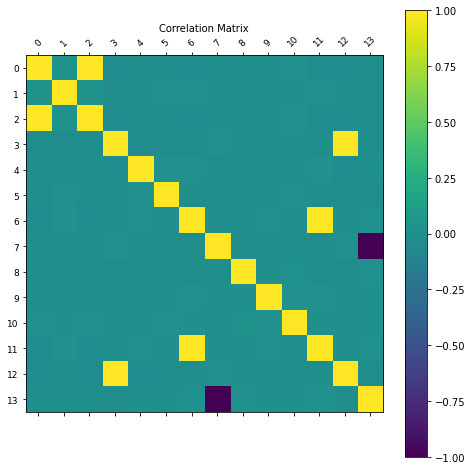

In [26]:
def correlation_matrix(x):
    # YOUR CODE HERE
    result = np.corrcoef(np.delete(x, 14, axis = 1).T)
    return result

corr_matrix = correlation_matrix(X_train) 

#TESTS
assert type(corr_matrix) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert corr_matrix.shape[0] == corr_matrix.shape[1], '–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ –∫–≤–∞–¥—Ä–∞—Ç–Ω–∞—è'
assert corr_matrix.shape[0] == 14, '–í—ã–±—Ä–∞–Ω—ã –Ω–µ –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–ª—è –º–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –∏–ª–∏ –≤—ã –Ω–µ —É–±—Ä–∞–ª–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å, –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ bais'
assert sum(map(lambda n: corr_matrix[n,n], range(0, corr_matrix.shape[0]))) == 14, '–ù–µ –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞'
assert sum(map(lambda n, k: round(corr_matrix[n,k], 3)==round(corr_matrix[k,n],3), 
                   range(0, corr_matrix.shape[0]), 
                   np.random.randint(14, size=14))), '–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞'

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–∞—Ç—Ä–∏—Ü—ã
plot_correlation_matrix(corr_matrix)

–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤—ã—à–µ, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã –¥—Ä—É–≥ —Å –¥—Ä—É–≥–æ–º. 

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ5.1: –æ—á–∏—Å—Ç–∏—Ç—å –ª–∏—à–Ω–µ–µ__</font>

–°–æ–∑–¥–∞–π—Ç–µ 2 –Ω–æ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ __X_train_new__ –∏ __X_test_new__ –∏–∑ __X_train__ –∏ __X_test__, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç —Å–æ–¥–µ—Ä–∂–∞—Ç—å —Ç–æ–ª—å–∫–æ –Ω–µ–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –ò –æ–±–Ω–æ–≤–∏—Ç–µ –≤–µ—Å–∞.

__–†–µ–∑—É–ª—å—Ç–∞—Ç:__ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫ –Ω–∞ train –∏ test –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö

In [27]:
X_train_new = np.delete(X_train, (2, 11, 12, 13, 14), axis = 1) # YOUR CODE HERE
X_test_new  = np.delete(X_test, (2, 11, 12, 13, 14), axis = 1) # YOUR CODE HERE

# TESTS
assert type(X_train_new) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert type(X_test_new) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert X_test_new.shape[1] == X_train_new.shape[1], '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ train –∏ test —Ä–∞–∑–ª–∏—á–Ω–æ'
assert X_test_new.shape[1] == 10, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ–≤–µ—Ä–Ω–æ'


# –û–±–Ω–æ–≤–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤
W = least_squares_weights(X_train_new[:,:], Y_train)

Y_train_predict = least_squares_predict(W, X_train_new[:,:])
Y_test_predict  = least_squares_predict(W, X_test_new[:,:])

# TESTS
assert len(W) == 10, '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–µ—Å–æ–≤ –Ω–µ–≤–µ—Ä–Ω–æ'
assert R_square(Y_train, Y_train_predict) > .98, '–ß—Ç–æ-—Ç–æ –ø–æ—à–ª–æ –Ω–µ —Ç–∞–∫, –º–µ—Ç—Ä–∏–∫–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –≤—ã—à–µ'
assert R_square(Y_test, Y_test_predict) > .98, '–ß—Ç–æ-—Ç–æ –ø–æ—à–ª–æ –Ω–µ —Ç–∞–∫, –º–µ—Ç—Ä–∏–∫–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –≤—ã—à–µ'

### T-test

__–í–µ–∫—Ç–æ—Ä –æ—Ü–µ–Ω–æ–∫ –≤–µ—Å–æ–≤ $w$ —è–≤–ª—è–µ—Ç—Å—è —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω–æ–π.__ 
–î–∞–Ω–Ω—ã–π —Ñ–∞–∫—Ç —Å–ª–µ–¥—É–µ—Ç –∏–∑ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è $\left({X}^{\text{T}} {X}\right)^{-1} {X}^{\text{T}} {y}$, –≥–¥–µ $y$ —Ç–∞–∫ –∂–µ —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞.

–í—ã–≤–æ–¥ —ç—Ç–æ–≥–æ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏—è –¥–æ–≤–æ–ª—å–Ω–æ –Ω–µ–ø—Ä–∏—è—Ç–µ–Ω, –∏ –±—ã–ª —Ä–∞–∑–æ–±—Ä–∞–Ω –Ω–∞ –ª–µ–∫—Ü–∏–∏. –°–µ–π—á–∞—Å –≤–∞–∂–Ω–æ, —á—Ç–æ –æ—Ü–µ–Ω–∫–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ $w_i$ –∏–º–µ—é—Ç –∞—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. 

------

–î–∞–Ω–Ω–æ–µ —Å–≤–æ–π—Å—Ç–≤–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–≤–µ—Ä—è—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞ –Ω—É–ª—é.

$$H_0: w_i=0 \\ H_1: w_i\not=0$$

__–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $t$__ –∏–º–µ–µ—Ç [—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –°—Ç—å—é–¥–µ–Ω—Ç–∞](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) —Å $n-k$ —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã –ø—Ä–∏ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ—Å—Ç–∏ $H_0$:

$$t=\frac{w_i}{se(w_i)}$$

__–≥–¥–µ__, 

- $n$ $-$ —á–∏—Å–ª–æ –æ–±—ä–µ–∫—Ç–æ–≤
- $k$ $-$ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- $se(w_i)$ $-$ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ $w_i$

–∑–Ω–∞—á–µ–Ω–∏—è $se(w_i)$ - –∫–æ—Ä–µ–Ω—å –∏–∑ –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã $\hat{Var}(w|X)$

$$\hat{Var}(w|X)=\hat\sigma^2({X}^{\text{T}} {X})^{-1}$$

__–≥–¥–µ__, $\hat\sigma^2$ —è–≤–ª—è–µ—Ç—Å—è –æ—Ü–µ–Ω–∫–æ–π –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–∏–Ω–∏—è $\sigma^2$ –∏ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è

$$\hat\sigma^2=\frac{RSS}{n-k}=\frac{\sum_{i=1}^n(y_i-wx_i)^2}{n-k}$$

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –º—ã –ø–æ–ª—É—á–∏–ª–∏ –æ–¥–Ω–æ–≤—ã–±–æ—Ä–æ—á–Ω—ã–π t-–∫—Ä–∏—Ç–µ—Ä–∏–π –°—Ç—å—é–¥–µ–Ω—Ç–∞. $\text{p_value}$ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–∞–∫:

$$\text{p_value}=2(1-cdf(t, df=n-k))$$

__–≥–¥–µ__,
$cdf(t, df=n-k)$ $-$ __–∑–Ω–∞—á–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è__ –°—Ç—å—é–¥–µ–Ω—Ç–∞ c $n-k$ —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã –≤ —Ç–æ—á–∫–µ $t$.

________________

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–π –¥–∞–Ω–Ω–æ–≥–æ –º–µ—Ç–æ–¥–∞ —Å–∞–º–∏ —Ä–∞—Å—á–∏—Ç—ã–≤–∞—é—Ç –∑–Ω–∞—á–µ–Ω–∏—è $t$-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∏ $\text{p_value}$. –ü—Ä–∏–º–µ—Ä –Ω–∏–∂–µ:

In [28]:
from statsmodels.regression.linear_model import OLS
model = OLS(Y_train,X_train_new[:,:], random_seed = 2)
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
print('W OLS ', [round(i, 3) for i in results.params])
print('t-stat', [round(i, 3) for i in results.tvalues])
print('pvalue', [round(i, 3) for i in results.pvalues])

W OLS  [-0.005, 0.001, -0.001, 90.084, 0.008, 8.285, 11.354, 91.419, 99.104, -0.002]
t-stat [-1.505, 0.411, -0.435, 25514.753, 2.277, 7809.592, 3240.363, 25483.605, 27776.828, -0.609]
pvalue [0.132, 0.681, 0.664, 0.0, 0.023, 0.0, 0.0, 0.0, 0.0, 0.542]


–ú–æ–∂–µ—Ç–µ —Å–≤–µ—Ä–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –≤–µ—Å–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã –ø–æ–ª—É—á–∏–ª–∏ –≤ –ø—Ä–µ–¥—É–¥—ã—â–∏—Ö –∑–∞–¥–∞–Ω–∏—è—Ö, —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º —Ä–∞–±–æ—Ç—ã –º–∞—Ç–æ–¥–∞ OLS –∏–∑ –ø–∞–∫–µ—Ç–∞ statsmodels. –ï—Å–ª–∏ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ 3-–≥–æ –∑–Ω–∞–∫–∞ –≤—Å–µ —Ö–æ—Ä–æ—à–æ, —Ç–æ –¥–≤–∏–≥–∞–π—Å—è –¥–∞–ª—å—à–µ, –µ—Å–ª–∏ –Ω–µ—Ç, —Ç–æ —á—Ç–æ-—Ç–æ –ø–æ—à–ª–æ –Ω–µ —Ç–∞–∫.

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ6: $\text{p_value}$__</font>

__–í –¥–∞–Ω–Ω–æ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å 3 —Ñ—É–Ω–∫—Ü–∏–∏ –∏ –¥–∞—Ç—å –æ—Ç–≤–µ—Ç –Ω–∞ –æ–¥–∏–Ω –≤–æ–ø—Ä–æ—Å:__
- __variance_matrix__: —Ä–∞—Å—á–µ—Ç –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã. 
    - _–í—Ö–æ–¥_: –ø—Ä–∏–∑–Ω–∞–∫–æ–≤–æ–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ $X$, –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç–æ–∫ $\text{y_true}$ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è $\text{y_predict}$
    - _–í—ã—Ö–æ–¥_: –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞
    
    
- __t_values__: —Ä–∞—Å—á–µ—Ç $t$-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
    - _–í—Ö–æ–¥_: –º–∞—Å—Å–∏–≤ –≤–µ—Å–æ–≤ $w$ –∏ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ $\text{X_variance}$
    - _–≤—ã—Ö–æ–¥_: –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π $t$-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –≤–µ—Å–æ–≤ $w$
    
    
- __p_values__: —Ä–∞—Å—á–µ—Ç $\text{p_value}$
    - _–í—Ö–æ–¥_: –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π $t$-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –≤–µ—Å–æ–≤ $w$ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–µ–ø–µ–Ω–µ–π —Å–≤–æ–±–æ–¥—ã $df$
    - _–≤—ã—Ö–æ–¥_: –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π $\text{p_value}$-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –≤–µ—Å–æ–≤ $w$
    
    
- –î–ª—è —Å–∫–æ–ª—å–∫–∏—Ö –≤–µ—Å–æ–≤ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è $H_0$ –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ $\alpha=0.05$?
    - –ü–µ—Ä–≤—ã–π –∫—Ç–æ —Ä–µ–∞–ª–∏–∑—É–µ—Ç –≤—Å–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏ —Å–∫–∞–∂–µ—Ç –≤–µ—Ä–Ω—ã–π –æ—Ç–≤–µ—Ç, –ø–æ–ª—É—á–∏—Ç –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –±–∞–ª–ª—ã
    
__!!–í–ê–ñ–ù–û!!__

- –ó–∞–¥–∞–Ω–∏–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è —Ä–µ—à–µ–Ω–Ω—ã–º, –µ—Å–ª–∏ –≤—Å–µ —Ç—Ä–∏ —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞–±–æ—Ç–∞—é—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ
- –ù–µ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –≤ —ç—Ç–∏—Ö —Ñ—É–Ω–∫—Ü–∏—è—Ö –ª–∏—à–Ω–∏–µ —Ü–∏–∫–ª—ã,  –∏–Ω–∞—á–µ –æ–Ω–∏ –±—É–¥—É—Ç –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω–æ –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–º–∏

In [30]:
def true_value_estimate(n, k, y_true, y_predict):
    return sum(pow(y_true-y_predict, 2)) / (n - k)
    

def variance_matrix(X, y_true, y_predict):
    # YOUR CODE HERE
    X = np.matrix(X)
    variance = true_value_estimate(X.shape[0], X.shape[1], y_true, y_predict) * np.linalg.inv(X.T.dot(X))
    return np.array(variance)

vcov =  variance_matrix(X_train_new[:,:], Y_train, Y_train_predict)

#TESTS
assert type(vcov) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert vcov.shape[0] == vcov.shape[1], '–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ –∫–≤–∞–¥—Ä–∞—Ç–Ω–∞—è'
assert vcov.shape[0] == W.shape[0], '–ú–∞—Ç—Ä–∏—Ü–∞ –Ω–µ –≤–µ—Ä–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞'
# –ø–æ–ª—É—á–∞–µ—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç: 0.00013 –≤–º–µ—Å—Ç–æ 0.00011. 
# –ü—Ä–æ–≤–µ—Ä–∏–ª, –∏—Å–ø–æ–ª—å–∑—É—è —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π –º–µ—Ç–æ–¥ cov_params –∏–∑ statsmodels.regression.linear_model.RegressionResults
# –†–µ–∑—É–ª—å—Ç–∞—Ç —Ç–æ—Ç –∂–µ, —á—Ç–æ –∏ —É –º–µ–Ω—è
assert np.round(sum(map(lambda n: vcov[n,n], range(0, vcov.shape[0]))), 5) == 0.00011, '–ú–∞—Ç—Ä–∏—Ü–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–∞ –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ'
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [31]:
def t_values(w, X_variance):
    # YOUR CODE HERE
    result = w / pow(X_variance.diagonal(), 0.5)
    return result

t = t_values(W, vcov) 

assert type(t) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert t.shape == W.shape, '–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –º–∞—Å—Å–∏–≤–∞ –≤–µ—Å–æ–≤ –∏ –º–∞—Å—Å–∏–≤–∞ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç'
assert [round(i, 3) for i in t] == [round(i, 3) for i in results.tvalues], '–†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞—Å—Å—á–∏—Ç–∞–Ω –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ'
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–ª–∏–æ—Ç–µ–∫–∏

In [32]:
def p_values(t, df):
    # YOUR CODE HERE
    result = 2 * (1 - stats.t.cdf(np.abs(t), df=df))
    return result

p = p_values(t, X_train_new.shape[0]-X_train_new.shape[1])

assert type(p) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–π —Ç–∏–ø'
assert p.shape == W.shape, '–†–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –º–∞—Å—Å–∏–≤–∞ –≤–µ—Å–æ–≤ –∏ –º–∞—Å—Å–∏–≤–∞ p_value –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç'
assert [round(i, 3) for i in p] == [round(i, 3) for i in results.pvalues], '–†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞—Å—Å—á–∏—Ç–∞–Ω –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ'
print([round(i, 4) for i in p])
print('–î–ª—è {} –≤–µ—Å–æ–≤ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è ùêª0 –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏  ùõº=0.05 '.format(len(p[p<=0.05])))

[0.1324, 0.6809, 0.6639, 0.0, 0.0228, 0.0, 0.0, 0.0, 0.0, 0.5425]
–î–ª—è 6 –≤–µ—Å–æ–≤ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è ùêª0 –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏  ùõº=0.05 


### Gradient descent

<font size=3>__–ù–µ–º–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏__</font>

–£ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –µ—Å—Ç—å —Ä—è–¥ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–≤:
1. —Ä–∞—Å—á–µ—Ç –ø—Å–µ–≤–¥–æ–æ–±—Ä–∞—Ç–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã —è–≤–ª—è–µ—Ç—Å—è –¥–æ–≤–æ–ª—å–Ω–æ —Å–ª–æ–∂–Ω–æ–π –æ–ø–µ—Ä–∞—Ü–∏–µ–π –∏ —Ä–∞–±–æ—Ç–∞–µ—Ç –¥–æ–ª–≥–æ –Ω–∞ –±–æ–ª—å—à–∏—Ö –æ–±—ä–µ–º–∞—Ö –¥–∞–Ω–Ω—ã—Ö
2. –¥–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ —Ç—Ä–µ–±—É–µ—Ç –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —É–ª–æ–≤–∏–π [—Ç–µ–æ—Ä–µ–º—ã –ì–∞—É—Å—Å–∞ - –ú–∞—Ä–∫–æ–≤–∞](https://ru.wikipedia.org/wiki/–¢–µ–æ—Ä–µ–º–∞_–ì–∞—É—Å—Å–∞_‚Äî_–ú–∞—Ä–∫–æ–≤–∞) –∏–Ω–∞—á–µ –æ—Ü–µ–Ω–∫–∏ –±—É–¥—É—Ç —Å–º–µ—â–µ–Ω–Ω—ã–º–∏.

__–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫__

–°–ø–æ—Å–æ–± —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É —á–∏—Å–ª–µ–Ω–Ω–æ. –ù–∏–≤–µ–ª–∏—Ä—É–µ—Ç –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è, –æ–¥–Ω–∞–∫–æ –Ω–µ –¥–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –≤—ã—á–∏—Å–ª—è—Ç—å –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –≤–µ—Å–æ–≤\–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏.

–í –æ–±—â–µ–º —Å–ª—É—á–∞–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è, —Å –ø–æ–º–æ—â—å—é –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞, –≤–µ—Å–∞ –æ–±–Ω–æ–≤–ª—è—é—Ç—Å—è —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

$$w^{n+1}_i=w^{n}_i-\gamma\bigtriangledown L(w^{n}_i)$$

__–≥–¥–µ__,

- $n$ $-$ –∏–Ω–¥–µ–∫c –∏—Ç–µ—Ä–∞—Ü–∏–∏
- $i$ $-$ –∏–Ω–¥–µ–∫c –ø—Ä–∏–∑–Ω–∞–∫–∞
- $\gamma$ $-$ –≤–µ–ª–∏—á–∏–Ω–∞ —à–∞–≥–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞
- $\bigtriangledown F(w^{n}_i)$ $-$ –∑–Ω–∞—á–µ–Ω–∏–µ [–≥—Ä–∞–¥–∏–µ–Ω—Ç–¥–∞](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82) —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –¥–ª—è $i$-–≥–æ –≤–µ—Å–∞ –Ω–∞ —à–∞–≥–µ $n$

__–ù–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞:__ –ù–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ $n$ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –≤—ã–±–æ—Ä–∫–∏. __–°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫__ —è–≤–ª—è–µ—Ç—Å—è –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–æ–π. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ—Ç–ª–∏—á–∏—Ç–µ–ª—å–Ω–æ–µ —Å–≤–æ–π—Å—Ç–≤–æ: –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞ –æ–¥–Ω–æ–º –æ–±—ä–µ–∫—Ç–µ, –∏–Ω–æ–≥–¥–∞ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –æ–±—ä–µ–∫—Ç–∞—Ö.

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ:7 –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫__</font>

__–¶–µ–ª—å:__ –†–µ–ª–∏–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ —Å—Ç–∞—Ö–æ—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –ø–æ—Ç–µ—Ä—å –∏ –æ—Ç—Å–ª–µ–¥–∏—Ç—å –ø—Ä–æ—Ü–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è —Å –ø–æ–º–æ—â—å—é –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏.

$$ L(y,X,w)=\frac{1}{n} \sum_{i=1}^n (y_i-Xw)^2$$

–î–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è –¥–≤–µ —Ñ—É–Ω–∫—Ü–∏–∏, –æ–¥–Ω–∞ –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —É–∂–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞

—Ñ—É–Ω–∫—Ü–∏—è __fit —É–∂–µ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–∞__ –∏ –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞:
1. –ø–µ—Ä–≤–∏—á–Ω—É—é –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—é –≤–µ—Å–æ–≤
2. –∏—Ç–µ—Ä–∞—Ü–∏–æ–Ω–Ω–æ–µ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ (__iters__ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π)
    - —Å–µ–º–ø–ª–∏—Ä—É–µ—Ç __batch_size__ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –∏–∑ –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ–±—ä–µ–∫—Ç–æ–≤. –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –æ–±—ä–µ–∫—Ç–æ–≤ > 1 –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏
    - –≤—ã–∑—ã–≤–∞–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞—Å—á–µ—Ç–∞ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –¥–ª—è –∑–∞–¥–∞–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–æ–≤ (__stochastic_gradient_step__)
3. –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é –æ–±—É—á–µ–Ω–∏—è (__plot__=True)

__–í—Ö–æ–¥__: –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç-–ø—Ä–∏–∑–Ω–∞–∫ $X$ –∏ –∏—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è $y$; –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–º –º–µ—Ç–æ–¥–æ–º  $\text{analytical_w}$

__–í—ã—Ö–æ–¥__: –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤ $w$ –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–æ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤ –ø—Ä–∏ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–º —Ä–µ—à–µ–Ω–∏–∏
_________

__–í–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ:__ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é __stochastic_gradient_step__, —Ü–µ–ª—å –∫–æ—Ç–æ—Ä–æ–π —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑ –≤–µ—Å–æ–≤ –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã—Ö –æ–±—ä–µ–∫—Ç–∞—Ö.

__–í—Ö–æ–¥:__

- $w$ $-$ –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤ —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —à–∞–≥–∞
- $X$ $-$ –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç-–ø—Ä–∏–∑–Ω–∞–∫, —Ä–∞–∑–º–µ—Ä–∞ ($\text{batch_size}$, $N$). $N$ $-$ —á–∏—Å–ª–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- $y$ $-$ –≤–µ–∫—Ç–æ—Ä –∏—Å—Ç–∏–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π $y$ –¥–ª–∏–Ω—ã $\text{batch_size}$

__–í—ã—Ö–æ–¥:__ –≤–µ–∫—Ç–æ—Ä –∑–Ω–∞—á–µ–Ω–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –≤–µ—Å–æ–≤



In [33]:
%matplotlib notebook

def stochastic_gradient_step(w, X, y):
    # YOUR CODE HERE
    grad = np.dot(1 / X.shape[0], np.dot(X.T, (np.dot(X, w) - y)))
    return grad 



def fit(X, y, analytical_w, random_state=42, iters=100, batch_size=10, learning_rate=0.05, plot=True):
    random_gen = np.random.RandomState(random_state)
    errors = []
    
    
    # –ø–æ–ª—É—á–∞–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –º–∞—Ç—Ä–∏—Ü—ã
    size, dim = X.shape

    # —Å–ª—É—á–∞–π–Ω–∞—è –Ω–∞—á–∞–ª—å–Ω–∞—è –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è
    w = random_gen.rand(dim)
    
    weights_history = w
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        # –±–µ—Ä—ë–º —Å–ª—É—á–∞–π–Ω—ã–π –Ω–∞–±–æ—Ä —ç–ª–µ–º–µ–Ω—Ç–æ–≤
        rand_indices = random_gen.choice(size, batch_size)
        X_ = X[rand_indices]
        y_ = y[rand_indices]

        # —Å—á–∏—Ç–∞–µ–º –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ
        grad = stochastic_gradient_step(w, X_, y_)
        assert type(grad) == np.ndarray, '–Ω–µ–≤–µ—Ä–Ω—ã–π —Ç–∏–ø'
        assert len(grad.shape) == 1, '–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –≤–µ—Ä–Ω—É—Ç—å –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –≤–µ–∫—Ç–æ—Ä'
        assert grad.shape[0] == len(w), '–¥–ª–∏–Ω–∞ –≤–µ–∫—Ç–æ—Ä–∞ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å —Ä–∞–≤–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –≤–µ—Å–æ–≤'
        
        w   -= grad * learning_rate
        
        # –û–±–Ω–æ–≤–ª—è–µ–º –≤–µ—Å–∞
        weights_history = np.vstack((weights_history, w))
        
        # error
        predict = least_squares_predict(w, X)
        errors.append(R_square(y, predict))
        
        if plot:
            ax1.clear()            
            ax1.plot(range(dim), analytical_w, 'bo-', label='Analytical solution')
            ax1.plot(range(dim), w, 'ro-', label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('weights')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('R_square')
            ax2.set_xlabel('itarations')
            
            ax3.plot(weights_history)
            ax3.set_title('update weights')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            
            time.sleep(0.3)
            fig.canvas.draw()
            
    return w, analytical_w

# X_train_new –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç-–ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ–ª—É—á–µ–Ω–Ω–∞—è –ø–æ—Å–ª–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∑–∞–¥–∞–Ω–∏—è ‚Ññ5.1:
# –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å 10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

w_SGD, w_OLS = fit(X_train_new, Y_train, analytical_w=W, plot=True)

Y_test_predict_OLS  = least_squares_predict(w_OLS, X_test_new[:,:])
Y_test_predict_SGD  = least_squares_predict(w_SGD, X_test_new[:,:])

assert .98 <= R_square(Y_test, Y_test_predict_OLS)/R_square(Y_test, Y_test_predict_SGD) <= 1.02, '–∑–∞–¥–∞–Ω–∏–µ —Ä–µ—à–µ–Ω–æ –Ω–µ –≤–µ—Ä–Ω–æ'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<font size=3>__–ù–µ–º–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏__</font>

–†–µ—à–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –∏–º–µ–µ—Ç —Ä—è–¥ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–æ–≤:
1.	–†–µ—à–µ–Ω–∏–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –Ω–µ —Å—Ç–∞–±–∏–ª—å–Ω—ã–º –∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–Ω—ã–º –≤ —Å–ª—É—á–∞–µ –Ω–∞–ª–∏—á–∏–µ –∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ì—Ä–∞–¥–∏–µ–Ω—Ç —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∑–∞–≤—ã—à–∞—Ç—å –≤–µ—Å–∞ —Ç–∞–∫–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, ¬´–∏–≥–Ω–æ—Ä–∏—Ä—É—è¬ª –¥—Ä—É–≥–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
2.	–î–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥ –Ω–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç –Ω–∞–ª–∏—á–∏–µ –Ω–µ–∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å—Ç—Ä–µ–º–∏—Ç—å—Å—è –≤—ã–¥–∞—Ç—å –∏–º —Ö–æ—Ç—å –∫–∞–∫–æ–π-—Ç–æ –≤–µ—Å —Ç–µ–º —Å–∞–º—ã–º –º–æ–¥–µ–ª—å —Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –º–µ–Ω–µ–µ —É—Å—Ç–æ–π—á–∏–≤–æ–π 

–†–µ—à–∏—Ç—å —ç—Ç–∏ –ø—Ä–æ–±–ª–µ–º—ã –º–æ–∂–Ω–æ —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ç–æ—Ä–æ–≤:
- __$L2$ Rige regression.__ –®—Ç—Ä–∞—Ñ—É–µ—Ç –∑–∞ —Å–∏–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –≤–µ—Å–∞, —Å—Ä–∞–º—è—Å—å —É–º–µ–Ω—å—à–∏—Ç—å —ç—Ñ—Ñ–µ–∫—Ç 1-–æ–π –ø—Ä–æ–±–ª–µ–º—ã.

$$L(y,X,w)=\frac{1}{n} \sum_{i=1}^n (y_i-Xw)^2+\delta\sum_{j=1}^pw_i^2$$ 
–≥–¥–µ $n$ $-$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤; $p$ $-$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤; $\lambda$ $-$ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏

- __$L1$ Lasso.__ –°—Ç—Ä–µ–º–∏—Ç—Å—è –æ–±–Ω—É–ª–∏—Ç—å –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–µ—Å–æ–≤. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —Ä–µ—à–∞–µ—Ç—Å—è 2-–∞—è –ø—Ä–æ–±–ª–µ–º–∞

$$L(y,X,w)=\frac{1}{n} \sum_{i=1}^n (y_i-Xw)^2+\lambda\sum_{j=1}^p|w_i|$$ 

–≥–¥–µ $n$ $-$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤; $p$ $-$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤; $\delta$ $-$ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏

- __ElasticNet.__ –û–±–æ–±—â–µ–Ω–Ω–∞—è —Ñ–æ—Ä–º–∞ $L1$ –∏ $L2$

$$L(y,X,w)=\frac{1}{n} \sum_{i=1}^n (y_i-Xw)^2+\alpha\gamma\sum_{j=1}^p|w_i|+0.5\alpha(1-\gamma)\sum_{j=1}^pw_i^2$$ 

–ï—Å–ª–∏ –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ –ø—Ä–æ—Å—Ç–æ–≥–æ —Å—É–º–º–∏—Ä–æ–≤–∞–Ω–∏—è $\lambda\text{L1}+\delta\text{L2}$, —Ç–æ

$\alpha=\lambda+\delta$ $-$ –æ–±—â–∏–π –º–Ω–æ–∂–∏—Ç–µ–ª—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ç–æ—Ä–æ–≤. –ü—Ä–∏ $\alpha=0$ –ø–æ–ª—É—á–∞–µ–º –∏—Å—Ö–æ–¥–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å, –±–µ–∑ —à—Ç—Ä–∞—Ñ–æ–≤. 

$\gamma=\frac{\lambda}{\lambda+\delta}$ $-$ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∫–ª–∞–¥–∞ $L1$. –ü—Ä–∏–Ω–∏–º–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç 0 –¥–æ 1. –ü—Ä–∏ $\gamma=0 \rightarrow \text{ElasticNet}=L2$; $\gamma=1 \rightarrow \text{ElasticNet}=L1$

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ:8 –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ –∏ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è__</font>

–í–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ __–ø–µ—Ä–µ–∞–∏—Å–∞—Ç—å__ —Ñ—É–Ω–∫—Ü–∏—é __stochastic_gradient_step__ —á—Ç–æ –±—ã –æ–Ω–∞ —Ä–∞—Å—á–∏—Ç—ã–≤–∞–ª–∞ –∑–Ω–∞—á–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤ –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å __ElasticNet__.

__–í—Ö–æ–¥:__   
- –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –∑–∞–¥–∞–Ω–∏—é ‚Ññ7
- alpha $(\alpha)$ $-$ –æ–±—â–∏–π –º–Ω–æ–∂–∏—Ç–µ–ª—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ç–æ—Ä–æ–≤ 
- l1_ratio $(\gamma)$ $-$ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç –≤–∫–ª–∞–¥–∞ $L1$

__–í—ã—Ö–æ–¥:__ –≤–µ–∫—Ç–æ—Ä –∑–Ω–∞—á–µ–Ω–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –≤–µ—Å–æ–≤

__!!–í–ê–ñ–ù–û!!__: 

- –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ç–æ –∫–∞–∫ –º–µ–Ω—è—é—Ç—Å—è –≤–µ—Å–∞ –ø—Ä–∏ –∏–∑–º–µ–Ω–µ–Ω–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ $\text{l1_ratio}$
- –§—É–Ω–∫—Ü–∏—è __fit__ –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –ø—Ä–µ–∂–Ω–µ–π

In [34]:
# –ò–∑–º–µ–Ω–∏—Ç—å –∫–æ–¥ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã —Ñ—É–Ω–∫—Ü–∏–π —Ç–∞–∫ —á—Ç–æ –±—ã –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫–∞–∫ l1 —Ç–∞–∫ –∏ l2 —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ
# –ö–∞–∫ –∏–∑–º–µ–Ω—è—é—Ç—Å—è –≤–µ—Å–∞ –≤ –∫—Ä–∞–µ–≤—ã—Ö —Å–ª—É—á–∞—è—Ö
def stochastic_gradient_step(w, X, y, alpha=1, l1_ratio=0.5):
    # YOUR CODE HERE
    grad_without_reg = np.dot(1 / X.shape[0], np.dot(X.T, (np.dot(X, w) - y)))
    grad = grad_without_reg + alpha * l1_ratio * np.where(w >= 0, 1, -1) + \
    alpha * (1 - l1_ratio) * w 
    return grad 

# –ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –∏—Å—Ö–æ–¥–Ω–æ–º –º–Ω–æ–∂–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (14)
# a_w - –≤–µ—Å–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–º —Ä–µ—à–µ–Ω–∏–µ–º. –£–º–µ–Ω—å—à–∏–ª –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–æ–∑–Ω–∞—Ç–µ–ª—å–Ω–æ, —á—Ç–æ –±—ã –≥—Ä–∞—Ñ–∏–∫ –æ–±—É—á–µ–Ω–∏—è –±—ã–ª —á–∏—Ç–∞–±–µ–ª–µ–Ω
a_w = [-8.21, 12.21, 7.38, 29.11, 34.44, 62.33, 12.95, 149.06, 91.42, 99.11, -0.0, -20.72, -41.53, 86.23, 1]
w = fit(X_train, Y_train, analytical_w=a_w)

# –ø—Ä–æ–≤–µ—Ä–∫–∞!!!
assert .98 <= R_square(Y_test, Y_test_predict_OLS)/R_square(Y_test, Y_test_predict_SGD) <= 1.02, '–∑–∞–¥–∞–Ω–∏–µ —Ä–µ—à–µ–Ω–æ –Ω–µ –≤–µ—Ä–Ω–æ'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Classification

In [35]:
%matplotlib inline

In [36]:
X_train, Y_train, X_test, Y_test = read_task_2_3('./task_3.csv', bias=False)

X_train.shape, X_test.shape

((699, 2), (300, 2))

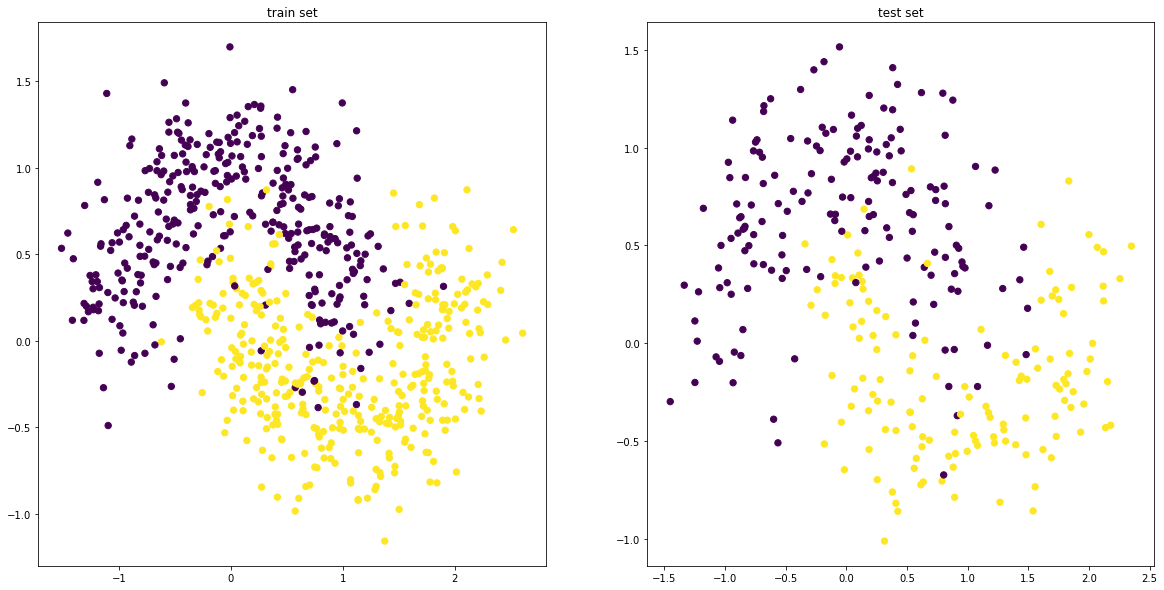

In [37]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.title('train set')
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=Y_train)

plt.subplot(1,2,2)
plt.title('test set')
plt.scatter(X_test[:,0], X_test[:,1], s=40, c=Y_test)

## Logistic regression

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ:9 –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è__</font>

__–ù–µ–æ–±—Ö–æ–¥–∏–º–æ —Ä–µ–∞–∑–ª–∏–∑–æ–≤–∞—Ç—å 2 —Ñ—É–Ω–∫—Ü–∏–∏:__

- __probability__ –æ—Ç–≤–µ—á–∞—é—â–∞—è –∑–∞ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å

$$L(X,w)=\frac{1}{1+\exp^{(-Xw)}}$$

__–í—Ö–æ–¥:__

- $w$ $-$ –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤
- $X$ $-$ –º–∞—Ç—Ä–∏—Ü–∞ –æ–±—ä–µ–∫—Ç-–ø—Ä–∏–∑–Ω–∞–∫

__–í—ã—Ö–æ–¥:__ –º–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å, –¥–ª–∏–Ω—ã $N$. –ì–¥–µ $N$ $-$ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤

__________
- __binary_class_prediction__ –≤—ã–∑—ã–≤–∞–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é __probability__ –∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –µ–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–∞ –ø–æ —Å–ª–µ–¥—É—é—â–µ–π –ª–æ–≥–∏–∫–µ: if prob>threshold then 1 else 0

__–í—ã—Ö–æ–¥:__ –º–∞—Å—Å–∏–≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–∞


__!!–í–∞–∂–Ω–æ!!:__ –í–µ—Å–∞ –ø–æ–ª—É—á–∞–µ–º –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–º –º–µ—Ç–æ–¥–æ–º –¥–ª—è –∏–∑ –∑–∞–¥–∞–Ω–∏–π —Å —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π


In [38]:
W = least_squares_weights(X_train, Y_train)

In [39]:
def probability(W, X):
    # YOUR CODE HERE
    result = 1 / (1 + np.exp(np.dot(-1 * X, W)))
    return result

prob = probability(W, X_train)

#TESTS
assert type(prob) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω—ã–π —Ç–∏–ø'
assert prob.shape == (X_train.shape[0],), '–ù–µ–≤–µ—Ä–Ω—ã–π —Ä–∞–∑–º–µ—Ä –º–∞—Å—Å–∏–≤–∞'
assert [round(i,3) for i in prob[[1, -1, 12]]] == [0.451, 0.624, 0.511], '–§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω–æ'

In [40]:
def binary_class_prediction(W, X, threshold =.5):
    prob =  probability(W, X)
    # YOUR CODE HERE
    result = prob > threshold
    return result

Y_train_predict = binary_class_prediction(W, X_train)
Y_test_predict = binary_class_prediction(W, X_test)

#TESTS
assert type(Y_train_predict) == np.ndarray, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω—ã–π —Ç–∏–ø'
assert Y_train_predict.shape == (X_train.shape[0],), '–ù–µ–≤–µ—Ä–Ω—ã–π —Ä–∞–∑–º–µ—Ä –º–∞—Å—Å–∏–≤–∞'
assert min(Y_train_predict) == 0, '–§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω–æ'
assert max(Y_train_predict) == 1, '–§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω–æ'

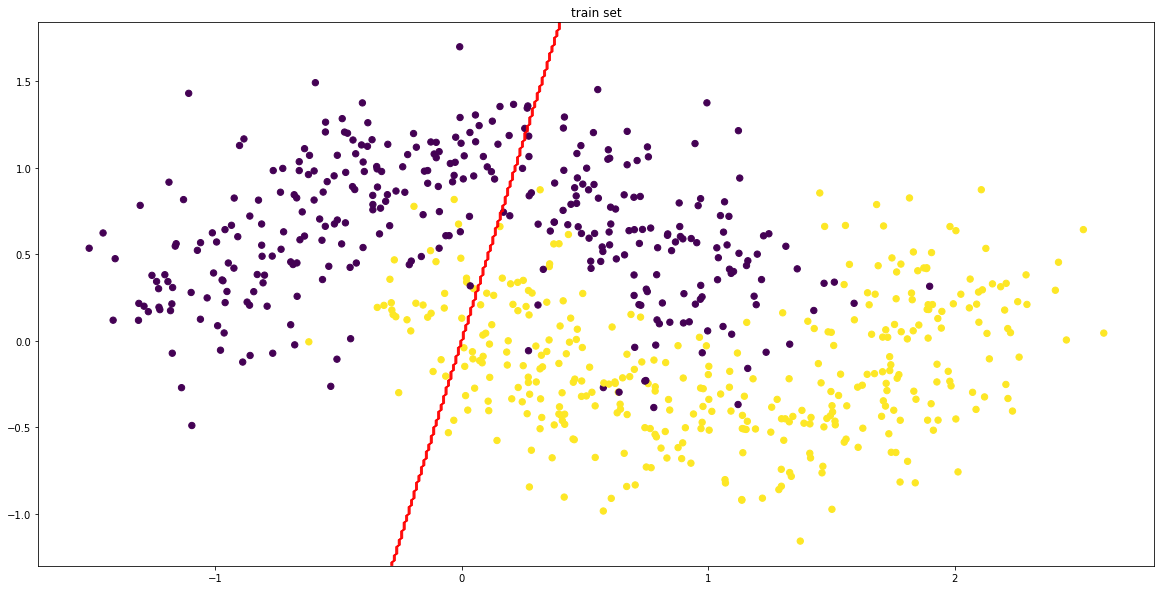

In [41]:
plt.figure(figsize=(20,10))
plt.title('train set')
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=Y_train)

# create grid to evaluate model
x_min, x_max = plt.xlim() 
y_min, y_max = plt.ylim() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))
Z = binary_class_prediction(W, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='r', linewidths=0.7)

## Errors

<font size=3, color="green">__–ó–∞–¥–∞–Ω–∏–µ ‚Ññ:10 accuracy__</font>

–†–µ–∞–ª–∏–∑—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é __binary_accuracy__ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—â—É—é –¥–æ–ª—é –≤–µ—Ä–Ω–æ —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü

__–í—Ö–æ–¥:__

- y_true $-$ –∏—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤
- y_predict $-$ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–æ–≤

__–í—ã—Ö–æ–¥:__ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ç 0 –¥–æ 1

In [42]:
def binary_accuracy(y_true, y_predict):
    # YOUR CODE HERE
    eps = 0.000001
    result = sum(abs(y_predict - y_true) < eps) / len(y_true)
    return result

assert type(binary_accuracy(Y_train, Y_train_predict)) == np.float64, '–í–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω—ã–π —Ç–∏–ø' 
assert 0<=binary_accuracy(Y_train, Y_train_predict)<=1, '–†–µ–∑—É–ª—å—Ç–∞—Ç –º–æ–∂–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ç 0 –¥–æ 1'
assert round(binary_accuracy(Y_train, Y_train_predict),2) == 0.75, '–§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω–æ'
assert round(binary_accuracy(Y_test, Y_test_predict),2) == 0.71, '–§—É–Ω–∫—Ü–∏—è —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–≤–µ—Ä–Ω–æ'